<a href="https://colab.research.google.com/github/chrisfeltner/feltner-cop4630/blob/master/HW2/ChristopherFeltnerHomework2Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
## Problem 2
## Christopher Feltner

## Loading the MNIST fashion data set

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Underfitting model
### The model is too simple to explain the data and there are too few epochs

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

epochs = 2
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 75us/sample - loss: 0.5996 - acc: 0.7983 - val_loss: 0.5007 - val_acc: 0.8284
Epoch 2/2
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4615 - acc: 0.8430 - val_loss: 0.4758 - val_acc: 0.8367


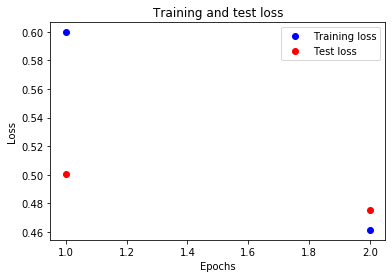

In [6]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

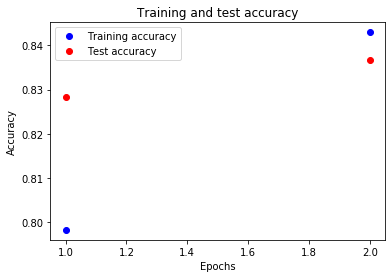

In [7]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Overfitting Model
### The model is unnecessarily complex and no dropout is used

In [8]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4972 - acc: 0.8205 - val_loss: 0.4404 - val_acc: 0.8296
Epoch 2/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3764 - acc: 0.8631 - val_loss: 0.3970 - val_acc: 0.8533
Epoch 3/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3381 - acc: 0.8757 - val_loss: 0.4284 - val_acc: 0.8447
Epoch 4/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3193 - acc: 0.8823 - val_loss: 0.3638 - val_acc: 0.8651
Epoch 5/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2983 - acc: 0.8905 - val_loss: 0.3748 - val_acc: 0.8682
Epoch 6/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2837 - acc: 0.8938 - val_loss: 0.3642 - val_acc: 0.8701
Epoch 7/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2717 - acc: 0.8996 - val_loss: 0.

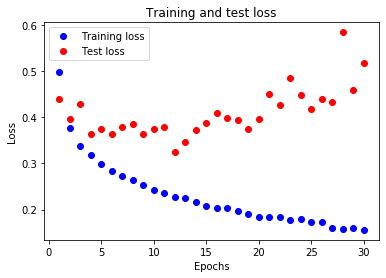

In [9]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

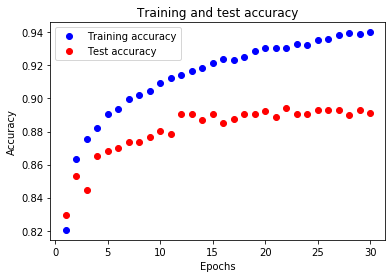

In [10]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Pretty Good Model
### Uses dropout to fight overfitting

In [28]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.6287 - acc: 0.7711 - val_loss: 0.4529 - val_acc: 0.8388
Epoch 2/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4856 - acc: 0.8237 - val_loss: 0.4304 - val_acc: 0.8466
Epoch 3/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4498 - acc: 0.8375 - val_loss: 0.4131 - val_acc: 0.8428
Epoch 4/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4332 - acc: 0.8433 - val_loss: 0.3929 - val_acc: 0.8595
Epoch 5/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4135 - acc: 0.8496 - val_loss: 0.3970 - val_acc: 0.8557
Epoch 6/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4081 - acc: 0.8521 - val_loss: 0.3722 - val_acc: 0.8650
Epoch 7/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3966 - acc: 0.8569 - val_loss: 0.

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3617 - acc: 0.8729
Test accuracy: 0.8729


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

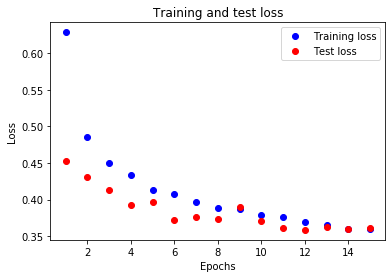

In [31]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

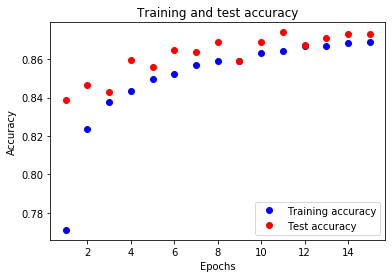

In [33]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()